In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [16]:
csv = 'csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv'

# Clases y demás

## Encontrar las veces que se repite un personaje

### Una clase para ver cuántas líneas de diálogo tienen los 10 personajes más repetidos

In [3]:
class ContadorPersonajesRepetidos:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)

    def contar_personajes_repetidos(self, num_personajes=10):
        # Contar la frecuencia de los personajes
        frecuencia_personajes = self.dataset['character'].value_counts()

        # Seleccionar los quince personajes más repetidos
        quince_personajes_mas_repetidos = frecuencia_personajes.head(num_personajes)

        # Crear un nuevo DataFrame con los quince personajes y sus repeticiones
        personajes_repetidos_15 = pd.DataFrame({'Personaje': quince_personajes_mas_repetidos.index, 'Repeticiones': quince_personajes_mas_repetidos.values})

        return personajes_repetidos_15

### Una clase para ver las veces que esos personajes son mencionados en los diálogos

In [4]:
class ContadorNombresEnDialogo:
    def __init__(self, dataset_path, palabras_a_buscar):
        self.dataset = pd.read_csv(dataset_path)
        self.palabras_a_buscar = [palabra.lower() for palabra in palabras_a_buscar]

    def contar_repeticiones(self):
        # Convertir el contenido de la columna "dialog" a minúsculas
        self.dataset['dialog'] = self.dataset['dialog'].str.lower()

        # Inicializar un diccionario para almacenar las repeticiones de cada palabra
        repeticiones = {palabra.capitalize(): [] for palabra in self.palabras_a_buscar}

        # Contar la frecuencia de cada palabra en todas las líneas de diálogo
        for palabra in self.palabras_a_buscar:
            repeticiones[palabra.capitalize()] = [len(re.findall(rf'\b{re.escape(palabra)}\b', dialog)) for dialog in self.dataset['dialog']]

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame({'Palabra': [palabra.capitalize() for palabra in self.palabras_a_buscar], 'Repeticiones': [sum(repeticiones[palabra.capitalize()]) for palabra in self.palabras_a_buscar]})
        
        # Calcular el sumatorio de repeticiones
        sumatorio_repeticiones = resultado_df['Repeticiones'].sum()

        # Agregar el sumatorio al DataFrame de resultados
        resultado_df = pd.concat([resultado_df, pd.DataFrame({'Palabra': ['Sumatorio'], 'Repeticiones': [sumatorio_repeticiones]})], ignore_index=True)

        return resultado_df

## Personajes más relevantes

In [6]:
if __name__ == "__main__":
    contador = ContadorPersonajesRepetidos('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv')
    resultados_personajes = contador.contar_personajes_repetidos()

resultados_personajes

,Personaje,Repeticiones
0,Harry Potter,314
1,Albus Dumbledore,99
2,Hermione Granger,94
3,Dolores Umbridge,80
4,Ron Weasley,53
5,Sirius Black,41
6,Cornelius Fudge,38
7,Severus Snape,29
8,Minerva McGonagall,24
9,Rubeus Hagrid,24


### Formas de referirse a los personajes más relevantes

In [8]:
palabras_a_buscar_harry = ["harry potter", "harry", "the boy who lived", "the chosen one", "potter", "mr. potter", "the gryffindor seeker", "harry james potter"]
palabras_a_buscar_dumbledore = ["albus percival wulfric brian dumbledore", "professor dumbledore", "dumbledore", "albus dumbledore", "headmaster", "chief warlock of the wizengamot", "the old professor", "the wise one", "albus", "the headmaster of hogwarts"]
palabras_a_buscar_hermione = ["hermione granger", "hermione", "granger", "miss granger", "hermione jean granger", "the brightest witch of her age", "the smart one"]
palabras_a_buscar_umbridge = ["Dolores Umbridge","Professor Umbridge","Umbridge","Madam Undersecretary" ,"the Inquisitor","the Toad","the Punisher","The Pink Lady"]
palabras_a_buscar_ron = ["ron", "ron weasley", "ronald", "ronald weasley", "the ginger", "ronniekins", "ginger nut", "the weasley boy", "won-won"]
palabras_a_buscar_sirius = ["Sirius Black","Sirius","Mr. Black","Padfoot","The Godfather","The Escaped Prisoner","Black, the Animagus"]
palabras_a_buscar_fudge = ["Cornelius Fudge","Minister Fudge","Fudge","Mr. Fudge","Minister of Magic","The Minister","The Minister with the Bowler Hat"]
palabras_a_buscar_snape = ["Severus Snape","Professor Snape","Snape","Severus","Snivellus" ,"The Potions Master"]
palabras_a_buscar_mcgonagall = ["professor mcgonagall", "mcgonagall", "minerva", "minerva mcgonagall", "deputy headmistress", "transfiguration professor", "mcg", "head of gryffindor"]
palabras_a_buscar_hagrid = ["hagrid", "rubeus hagrid", "keeper of keys and grounds", "keeper of the keys", "keeper of the grounds", "gamekeeper", "hagrid the giant", "fang's owner", "half-giant"]

#### Harry Potter - 212 veces

In [9]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_harry
    contador = ContadorNombresEnDialogo('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv', palabras_a_buscar)
    resultados_harry = contador.contar_repeticiones()

resultados_harry

,Palabra,Repeticiones
0,Harry potter,8
1,Harry,123
2,The boy who lived,0
3,The chosen one,0
4,Potter,74
5,Mr. potter,7
6,The gryffindor seeker,0
7,Harry james potter,0
8,Sumatorio,212


#### Dumbledore - 57 veces

In [11]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dumbledore
    contador = ContadorNombresEnDialogo('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv', palabras_a_buscar)
    resultados_dumbledore = contador.contar_repeticiones()

resultados_dumbledore

,Palabra,Repeticiones
0,Albus percival wulfric brian dumbledore,1
1,Professor dumbledore,1
2,Dumbledore,43
3,Albus dumbledore,1
4,Headmaster,8
5,Chief warlock of the wizengamot,0
6,The old professor,0
7,The wise one,0
8,Albus,2
9,The headmaster of hogwarts,1


#### Hermione - 19 veces

In [12]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hermione
    contador = ContadorNombresEnDialogo('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv', palabras_a_buscar)
    resultados_hermione = contador.contar_repeticiones()

resultados_hermione

,Palabra,Repeticiones
0,Hermione granger,0
1,Hermione,17
2,Granger,1
3,Miss granger,1
4,Hermione jean granger,0
5,The brightest witch of her age,0
6,The smart one,0
7,Sumatorio,19


#### Umbridge - 19 veces

In [14]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_umbridge
    contador = ContadorNombresEnDialogo('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv', palabras_a_buscar)
    resultados_umbridge = contador.contar_repeticiones()

resultados_umbridge

,Palabra,Repeticiones
0,Dolores umbridge,1
1,Professor umbridge,4
2,Umbridge,14
3,Madam undersecretary,0
4,The inquisitor,0
5,The toad,0
6,The punisher,0
7,The pink lady,0
8,Sumatorio,19


#### Ron - 8 veces

In [13]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_ron
    contador = ContadorNombresEnDialogo('csv/5_Harry_Potter_and_the_Order_of_the_Phoenix.csv', palabras_a_buscar)
    resultados_ron = contador.contar_repeticiones()

resultados_ron

,Palabra,Repeticiones
0,Ron,8
1,Ron weasley,0
2,Ronald,0
3,Ronald weasley,0
4,The ginger,0
5,Ronniekins,0
6,Ginger nut,0
7,The weasley boy,0
8,Won-won,0
9,Sumatorio,8


#### Sirius - 34 veces

In [17]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_sirius
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_sirius = contador.contar_repeticiones()

resultados_sirius

,Palabra,Repeticiones
0,Sirius black,1
1,Sirius,32
2,Mr. black,0
3,Padfoot,1
4,The godfather,0
5,The escaped prisoner,0
6,"Black, the animagus",0
7,Sumatorio,34


#### Fudge - 8 veces

In [18]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_fudge
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_fudge = contador.contar_repeticiones()

resultados_fudge

,Palabra,Repeticiones
0,Cornelius fudge,0
1,Minister fudge,0
2,Fudge,5
3,Mr. fudge,0
4,Minister of magic,1
5,The minister,2
6,The minister with the bowler hat,0
7,Sumatorio,8


#### Snape - 14 veces

In [19]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_snape
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_snape = contador.contar_repeticiones()

resultados_snape

,Palabra,Repeticiones
0,Severus snape,1
1,Professor snape,3
2,Snape,6
3,Severus,2
4,Snivellus,2
5,The potions master,0
6,Sumatorio,14


#### McGonagall - 6 veces

In [20]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_mcgonagall
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_mcgonagall = contador.contar_repeticiones()

resultados_mcgonagall

,Palabra,Repeticiones
0,Professor mcgonagall,2
1,Mcgonagall,3
2,Minerva,1
3,Minerva mcgonagall,0
4,Deputy headmistress,0
5,Transfiguration professor,0
6,Mcg,0
7,Head of gryffindor,0
8,Sumatorio,6


#### Hagrid - 16 veces

In [21]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hagrid
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_hagrid = contador.contar_repeticiones()

resultados_hagrid

,Palabra,Repeticiones
0,Hagrid,16
1,Rubeus hagrid,0
2,Keeper of keys and grounds,0
3,Keeper of the keys,0
4,Keeper of the grounds,0
5,Gamekeeper,0
6,Hagrid the giant,0
7,Fang's owner,0
8,Half-giant,0
9,Sumatorio,16


### Continuación

#### Añadimos los resultados al dataframe original

In [22]:
resultados = [212, 57, 19, 19, 8, 10, 34, 14, 6, 16]

Añadimos columna

In [23]:
resultados_personajes['Menciones'] = resultados
resultados_personajes

,Personaje,Repeticiones,Menciones
0,Harry Potter,314,212
1,Albus Dumbledore,99,57
2,Hermione Granger,94,19
3,Dolores Umbridge,80,19
4,Ron Weasley,53,8
5,Sirius Black,41,10
6,Cornelius Fudge,38,34
7,Severus Snape,29,14
8,Minerva McGonagall,24,6
9,Rubeus Hagrid,24,16


Sumamos las columnas

In [24]:
resultados_personajes['Total'] = resultados_personajes['Repeticiones'] + resultados_personajes['Menciones']
resultados_personajes

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,314,212,526
1,Albus Dumbledore,99,57,156
2,Hermione Granger,94,19,113
3,Dolores Umbridge,80,19,99
4,Ron Weasley,53,8,61
5,Sirius Black,41,10,51
6,Cornelius Fudge,38,34,72
7,Severus Snape,29,14,43
8,Minerva McGonagall,24,6,30
9,Rubeus Hagrid,24,16,40


Re-ordenamos las columnas

In [25]:
resultados_personajes = resultados_personajes.sort_values(by='Total', ascending=False)
resultados_personajes = resultados_personajes.reset_index(drop=True)
resultados_personajes # podemos observar cambios en el orden

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,314,212,526
1,Albus Dumbledore,99,57,156
2,Hermione Granger,94,19,113
3,Dolores Umbridge,80,19,99
4,Cornelius Fudge,38,34,72
5,Ron Weasley,53,8,61
6,Sirius Black,41,10,51
7,Severus Snape,29,14,43
8,Rubeus Hagrid,24,16,40
9,Minerva McGonagall,24,6,30


Filtramos solo por el total

In [26]:
resultados_personajes = resultados_personajes[['Personaje', 'Total']]
resultados_personajes

,Personaje,Total
0,Harry Potter,526
1,Albus Dumbledore,156
2,Hermione Granger,113
3,Dolores Umbridge,99
4,Cornelius Fudge,72
5,Ron Weasley,61
6,Sirius Black,51
7,Severus Snape,43
8,Rubeus Hagrid,40
9,Minerva McGonagall,30


Vamos a hacer una gráfica

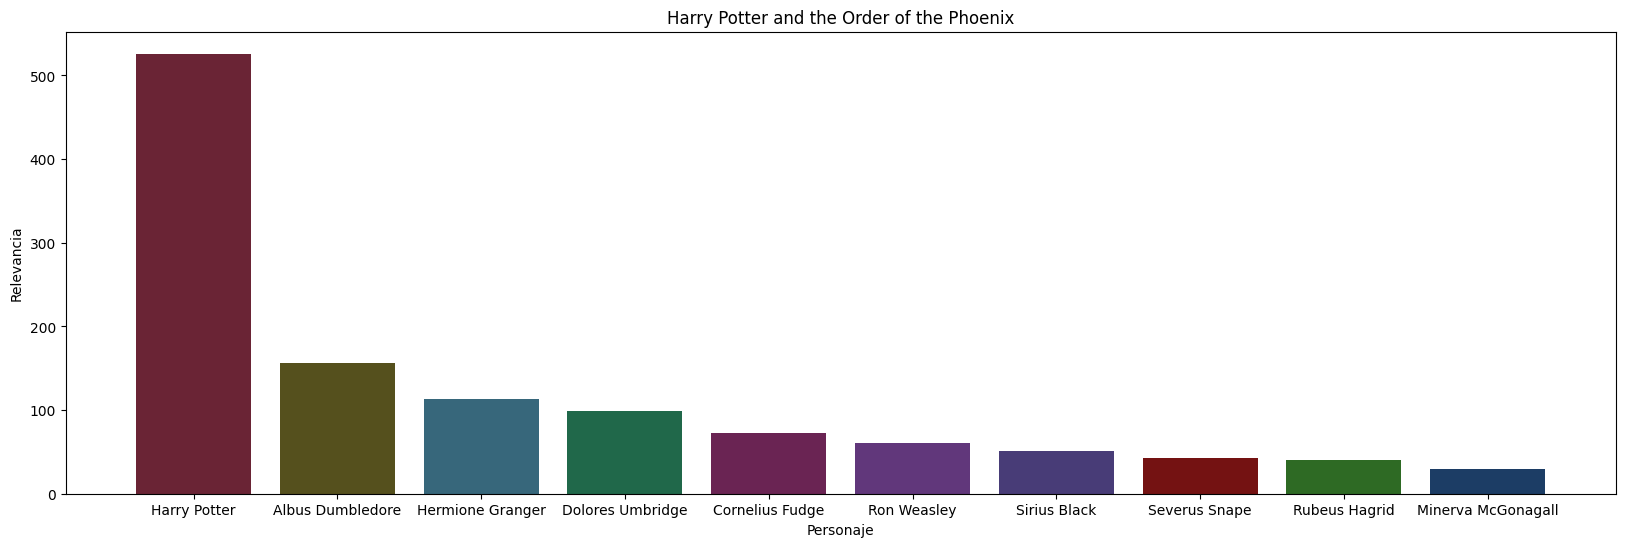

In [30]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#6A2435', '#55501D', '#37677B', '#20684A', '#6A2453', '#61377B', '#483C77', '#741212', '#2E6A24', '#1C3D65']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Order of the Phoenix")

plt.show()

Sacamos cvs para no perder los datos

In [32]:
resultados_personajes.to_csv('csv/Personajes_relevantes/HP_5.csv', index=False)
